In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

2023-03-04 17:58:21.552833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 17:58:21.603045: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[0]]) # 0, 1, 2 - symbolizes sth

In [4]:
decoded_review[:30]

'? this film was just brilliant'

In [5]:
len(X_train[1]), len(X_train[0]) # rozne dlugosci!

(189, 218)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [8]:
X_train.shape

(25000, 10000)

In [9]:
y_test = np.float32(y_test)
y_train = y_train.astype('float32')

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)), # (10000,) because it is (10000, any batch_size)
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

2023-03-04 17:58:27.052625: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-04 17:58:27.052647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: kk21
2023-03-04 17:58:27.052650: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: kk21
2023-03-04 17:58:27.052781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.86.1
2023-03-04 17:58:27.052793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2023-03-04 17:58:27.052796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.86.1
2023-03-04 17:58:27.053073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neu

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from keras import losses, metrics, optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [15]:
X_val = X_train[:10000]
X_train = X_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [16]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5247 - binary_accuracy: 0.7800 - val_loss: 0.4095 - val_binary_accuracy: 0.8511
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3196 - binary_accuracy: 0.9009 - val_loss: 0.3100 - val_binary_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2327 - binary_accuracy: 0.9257 - val_loss: 0.2805 - val_binary_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1814 - binary_accuracy: 0.9410 - val_loss: 0.2735 - val_binary_accuracy: 0.8922
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1447 - binary_accuracy: 0.9553 - val_loss: 0.2816 - val_binary_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1201 - binary_accuracy: 0.9625 - val_loss: 0.2937 - val_binary_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0

In [17]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [19]:
import matplotlib.pyplot as plt
def loss_plot(history_dict, epochs=20):
    x = np.arange(1,epochs+1)
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    plt.title('Train loss & validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x, train_loss, 'o', label='Train loss')
    plt.plot(x, val_loss, 'x', label='Validation loss')
    plt.legend()
    plt.show()



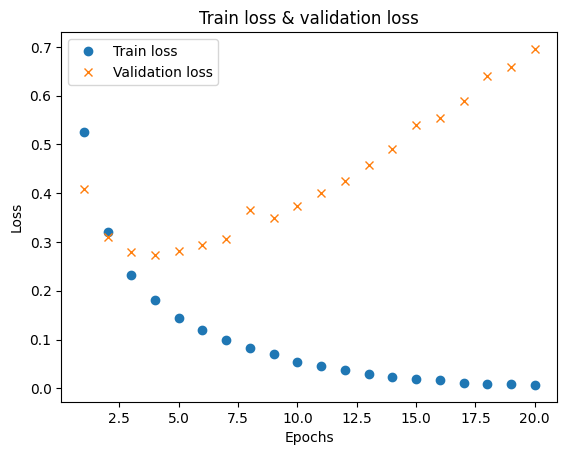

In [20]:
loss_plot(history_dict)

In [21]:
def acc_plot(history_dict, epochs=20):
    x = np.arange(1,epochs+1)
    if 'binary_accuracy' in history_dict.keys():
        train_acc = history_dict['binary_accuracy']
    else:
        train_acc = history_dict['accuracy']
    if 'val_binary_accuracy' in history_dict.keys():
        val_acc = history_dict['val_binary_accuracy']
    else:
        val_acc = history_dict['val_accuracy']

    plt.title('Train accuracy & validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuarcy')
    plt.plot(x, train_acc, 'o', label="Train accuracy")
    plt.plot(x, val_acc, 'x', label="Validation accuracy")
    plt.legend()
    plt.show()

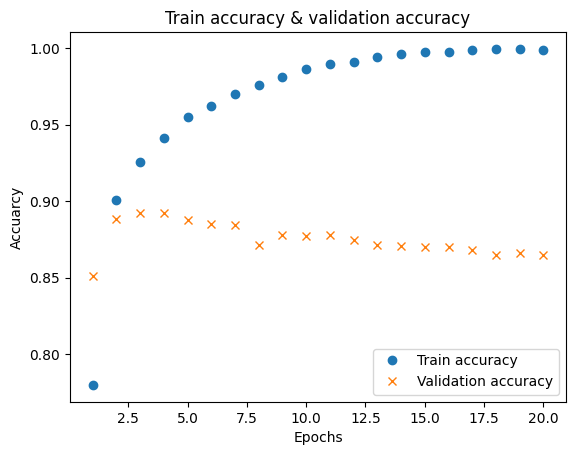

In [22]:
acc_plot(history_dict)

<b>Overfitting! It would be necessary to re-train the model on only 4 epochs.</b>

In [23]:
model.predict(X_test)

782/782 [==============================] - 0s 515us/step


array([[0.00620012],
       [0.9999996 ],
       [0.9776958 ],
       ...,
       [0.00177102],
       [0.00432639],
       [0.9227912 ]], dtype=float32)

# Methods to fight overfitting
- More data
- Less parameters in network
- Regularization
- Dropout

In [24]:
from keras import regularizers
lambda_coef = 0.001

In [25]:
l2_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l2(lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])

Epoch 1/10
30/30 [==============================] - 1s 17ms/step - loss: 0.5757 - accuracy: 0.7792 - val_loss: 0.4497 - val_accuracy: 0.8652
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3787 - accuracy: 0.8923 - val_loss: 0.3749 - val_accuracy: 0.8736
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3033 - accuracy: 0.9142 - val_loss: 0.3369 - val_accuracy: 0.8889
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2623 - accuracy: 0.9268 - val_loss: 0.3557 - val_accuracy: 0.8741
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2366 - accuracy: 0.9377 - val_loss: 0.3270 - val_accuracy: 0.8888
Epoch 6/10
30/30 [==============================] - 0s 10ms/step - loss: 0.2166 - accuracy: 0.9454 - val_loss: 0.3343 - val_accuracy: 0.8861
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2048 - accuracy: 0.9512 - val_loss: 0.3381 - val_accuracy: 0.8852
Epoch 8/10
30/30 [

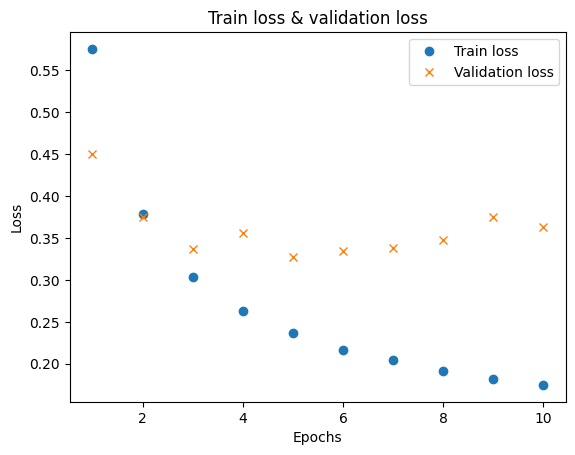

In [26]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 17ms/step - loss: 1.1494 - accuracy: 0.7253 - val_loss: 0.7133 - val_accuracy: 0.8417
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.6666 - accuracy: 0.8423 - val_loss: 0.6809 - val_accuracy: 0.8148
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6249 - accuracy: 0.8463 - val_loss: 0.6089 - val_accuracy: 0.8593
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5873 - accuracy: 0.8605 - val_loss: 0.5893 - val_accuracy: 0.8630
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5682 - accuracy: 0.8645 - val_loss: 0.5710 - val_accuracy: 0.8628
Epoch 6/10
30/30 [==============================] - 0s 10ms/step - loss: 0.5617 - accuracy: 0.8633 - val_loss: 0.5864 - val_accuracy: 0.8500
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5471 - accuracy: 0.8686 - val_loss: 0.5866 - val_accuracy: 0.8474
Epoch 8/10
30/30 [

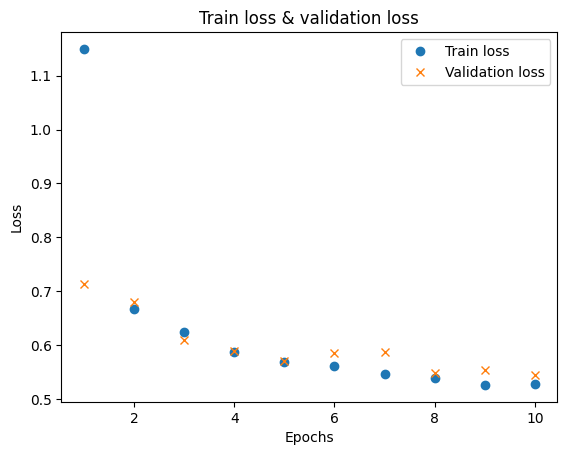

In [27]:
l1_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l1(lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])
l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 16ms/step - loss: 1.1875 - accuracy: 0.6835 - val_loss: 0.7812 - val_accuracy: 0.8212
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.7257 - accuracy: 0.8122 - val_loss: 0.6935 - val_accuracy: 0.8391
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.6560 - accuracy: 0.8425 - val_loss: 0.6959 - val_accuracy: 0.7967
Epoch 4/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6075 - accuracy: 0.8583 - val_loss: 0.6209 - val_accuracy: 0.8450
Epoch 5/10
30/30 [==============================] - 0s 11ms/step - loss: 0.5817 - accuracy: 0.8595 - val_loss: 0.5766 - val_accuracy: 0.8594
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5571 - accuracy: 0.8679 - val_loss: 0.5638 - val_accuracy: 0.8660
Epoch 7/10
30/30 [==============================] - 0s 10ms/step - loss: 0.5480 - accuracy: 0.8707 - val_loss: 0.5549 - val_accuracy: 0.8672
Epoch 8/10
30/30 

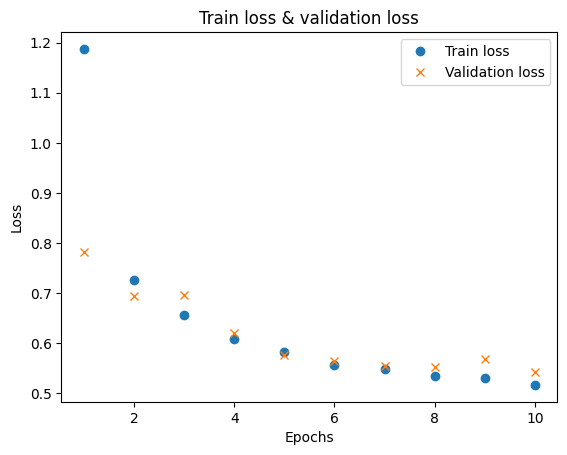

In [28]:
l1l2_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=lambda_coef, l2=lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=lambda_coef, l2=lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])
l1l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 16ms/step - loss: 0.5452 - accuracy: 0.8748 - val_loss: 0.5010 - val_accuracy: 0.8702
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5075 - accuracy: 0.8800 - val_loss: 0.4978 - val_accuracy: 0.8742
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.4999 - accuracy: 0.8835 - val_loss: 0.4992 - val_accuracy: 0.8767
Epoch 4/10
30/30 [==============================] - 0s 10ms/step - loss: 0.4959 - accuracy: 0.8839 - val_loss: 0.5011 - val_accuracy: 0.8722
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.4903 - accuracy: 0.8858 - val_loss: 0.4997 - val_accuracy: 0.8733
Epoch 6/10
30/30 [==============================] - 0s 10ms/step - loss: 0.4865 - accuracy: 0.8878 - val_loss: 0.5099 - val_accuracy: 0.8657
Epoch 7/10
30/30 [==============================] - 0s 10ms/step - loss: 0.4776 - accuracy: 0.8916 - val_loss: 0.5306 - val_accuracy: 0.8529
Epoch 8/10
30/30

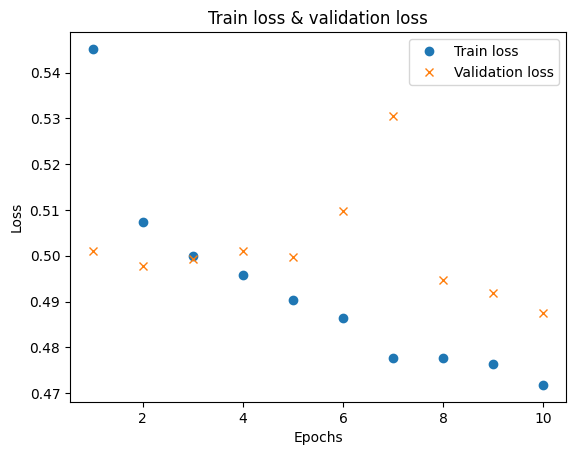

In [29]:
from keras.layers import Dropout
dpt_model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
l1l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)